Import data and libraries

In [2]:
#Import library
#Using python 3.9.7
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

#Import dataset
df = pd.read_csv('dataset/historical-database.csv', sep = ';')

Prepare Data

In [3]:
#Fix column`s names
df.columns = list(df.columns[0:-1]) + ['destinated_area']

#Put None in raws that area missing values
df.loc[:,'destinated_area'] = df.loc[:,'destinated_area'].map(lambda x: None if x == ',' else x)

#Convert destinated_area to float
df.loc[:,'destinated_area'] = df.loc[:,'destinated_area'].map(lambda x: float(x[0:-1]) if (x != None and x[-1] == ',') else x)
df.loc[:,'destinated_area'] = df.loc[:,'destinated_area'].map(lambda x: (int(x.split(',')[0]) + int(x.split(',')[1])/(10**len(x.split(',')[1]))) 
                                                                        if (x != None and type(x) != float) else x)

#Convert date in columns year to year
df.loc[:,'year'] = df.loc[:,'year'].map(lambda x: int(x[6::]))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73744 entries, 0 to 73743
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             73744 non-null  int64  
 1   city_code        73744 non-null  object 
 2   product_type     73744 non-null  object 
 3   product          73744 non-null  object 
 4   destinated_area  34709 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ MB


In [4]:
#Is there any duplicate row?
auxiliar_df = df.iloc[:,:-1]
print(f'n rows df: {len(df)} n rows df.dropduplicates: {len(auxiliar_df.drop_duplicates())}')

#Don't have any duplicate row

n rows df: 73744 n rows df.dropduplicates: 73744


In [5]:
#Define number of categories
n_city = len(df.city_code.unique())
n_product = len(df['product'].unique())
n_product_type = len(df.product_type.unique())
n_year = len(df.year.unique())
print(f' n_city: {n_city}\n n_product: {n_product}\n n_product_type: {n_product_type}\n n_year: {n_year}')

 n_city: 144
 n_product: 11
 n_product_type: 3
 n_year: 44


In [6]:
#is it possible to ignore some years?
#define df without missing values
df_without_missing_values = df.loc[df['destinated_area'].notnull()]

#define percente of zeros at df per year
percent_zeros_df = {}
for year,sub_df in df.groupby('year'):
    percent_zeros_df.update({year: round(sub_df.destinated_area.value_counts()[0]/len(sub_df),2)})

#define percente of zeros at df_without_missing_values per year
percent_zeros_df_no_missing_values = {}
for year,sub_df in df_without_missing_values.groupby('year'):
    percent_zeros_df_no_missing_values.update({year: round(sub_df.destinated_area.value_counts()[0]/len(sub_df),2)})

print(f'Percente of zeros in df: \n{percent_zeros_df}')
print(f'\nPercente of zeros in df_no_missing_values: \n{percent_zeros_df_no_missing_values}')


Percente of zeros in df: 
{1974: 0.18, 1975: 0.18, 1976: 0.18, 1977: 0.18, 1978: 0.18, 1979: 0.18, 1980: 0.18, 1981: 0.18, 1982: 0.18, 1983: 0.18, 1984: 0.18, 1985: 0.17, 1986: 0.17, 1987: 0.17, 1988: 0.08, 1989: 0.06, 1990: 0.06, 1991: 0.06, 1992: 0.06, 1993: 0.04, 1994: 0.04, 1995: 0.04, 1996: 0.04, 1997: 0.02, 1998: 0.01, 1999: 0.01, 2000: 0.01, 2001: 0.02, 2002: 0.02, 2003: 0.03, 2004: 0.03, 2005: 0.03, 2006: 0.03, 2007: 0.02, 2008: 0.02, 2009: 0.02, 2010: 0.03, 2011: 0.02, 2012: 0.02, 2013: 0.02, 2014: 0.02, 2015: 0.03, 2016: 0.02, 2017: 0.03}

Percente of zeros in df_no_missing_values: 
{1974: 1.0, 1975: 1.0, 1976: 1.0, 1977: 1.0, 1978: 1.0, 1979: 1.0, 1980: 1.0, 1981: 1.0, 1982: 1.0, 1983: 1.0, 1984: 1.0, 1985: 0.67, 1986: 0.67, 1987: 0.67, 1988: 0.16, 1989: 0.12, 1990: 0.13, 1991: 0.12, 1992: 0.12, 1993: 0.08, 1994: 0.06, 1995: 0.07, 1996: 0.06, 1997: 0.02, 1998: 0.02, 1999: 0.02, 2000: 0.02, 2001: 0.03, 2002: 0.04, 2003: 0.04, 2004: 0.05, 2005: 0.05, 2006: 0.04, 2007: 0.04, 20

In [7]:
#We can delete this years, because they don`t give any information about this areas
df = df.loc[~df.year.isin(range(1974,1985))]

Deal with missing values

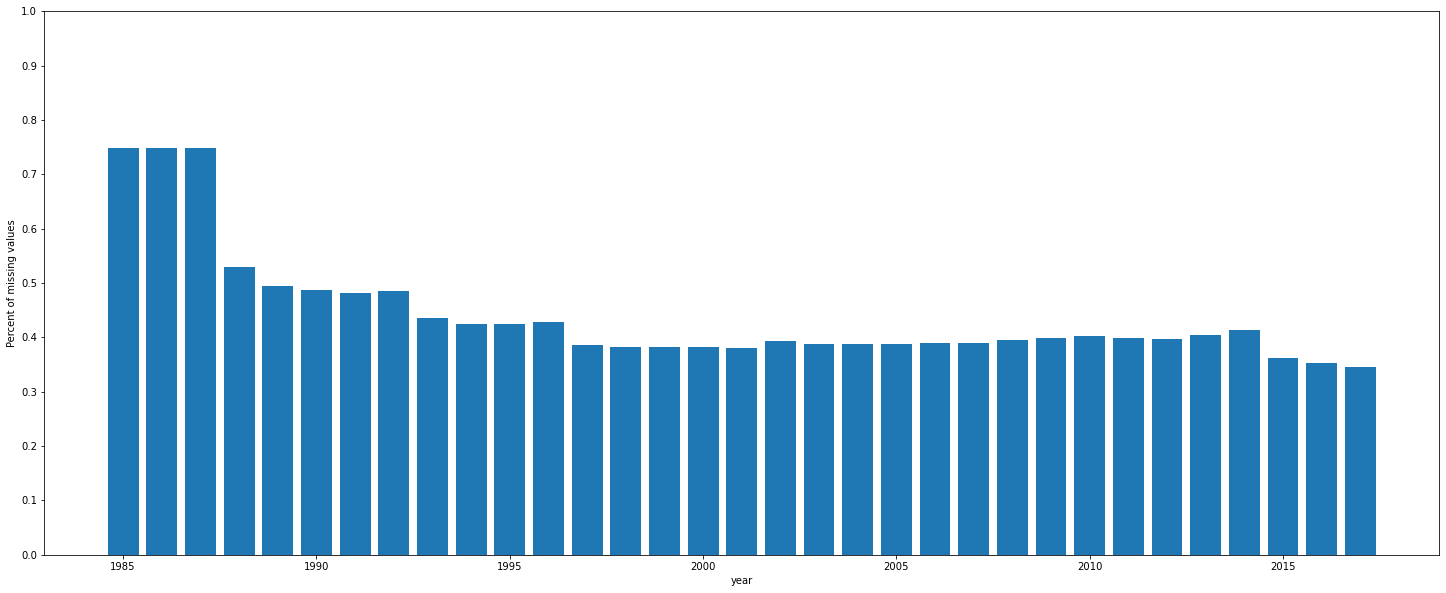

In [9]:
#percent of missing values per year
percent_missing_values_per_year = []
years = []
for year,sub_df in df.groupby('year'):
    percent_missing_values_per_year.append(sub_df.destinated_area.isnull().value_counts()[1]/len(sub_df))
    years.append(year)

#Grapich
_ = plt.figure(figsize = (25,10))
plt.xlabel('year')
plt.ylabel('Percent of missing values')
plt.bar(years,percent_missing_values_per_year)
plt.yticks(np.linspace(0,1,11))
plt.show()

In [10]:
#After 1997 the missing data is continuos, and in a lower level, so we will get the data after 1997
df = df.loc[~df.year.isin(range(1985,1997))]

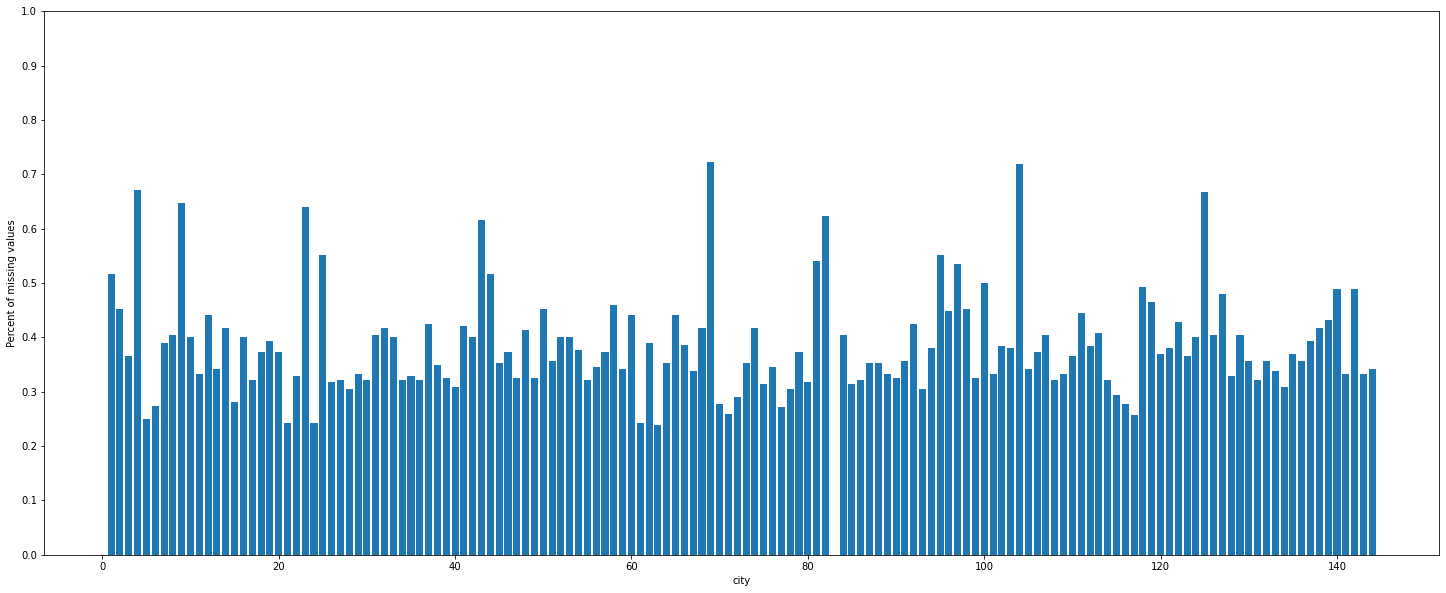

In [11]:
#percent of missing values per city_code
percent_missing_values_per_city = []
for city,sub_df in df.groupby('city_code'):
    percent_missing_values_per_city.append(1 - sub_df.destinated_area.isnull().value_counts()[0]/len(sub_df))

#Grapich
_ = plt.figure(figsize = (25,10))
plt.xlabel('city')
plt.ylabel('Percent of missing values')
plt.bar(range(1,len(percent_missing_values_per_city)+1),percent_missing_values_per_city)
plt.yticks(np.linspace(0,1,11))
plt.show()

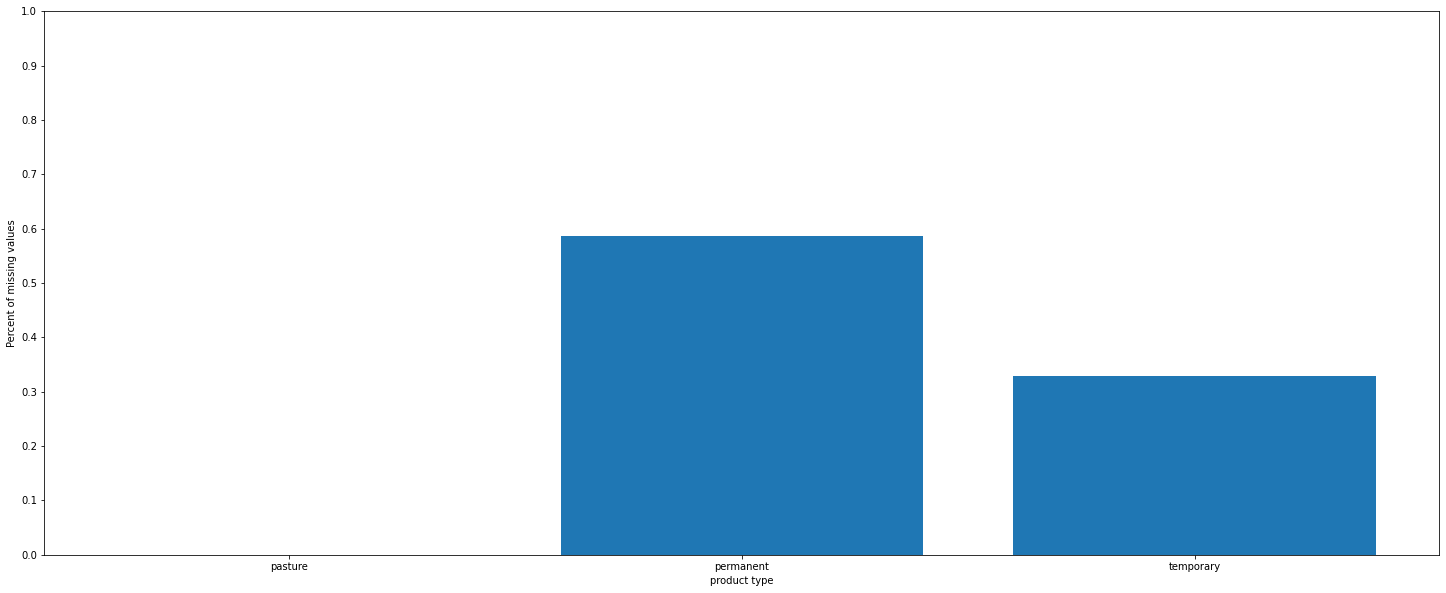

In [12]:
#percent of missing values per product type
percent_missing_values_per_product_type = []
products_types = []
for product_type,sub_df in df.groupby('product_type'):
    percent_missing_values_per_product_type.append(1 - sub_df.destinated_area.isnull().value_counts()[0]/len(sub_df))
    products_types.append(product_type)

#Grapich
_ = plt.figure(figsize = (25,10))
plt.xlabel('product type')
plt.ylabel('Percent of missing values')
plt.bar(products_types,percent_missing_values_per_product_type)
plt.yticks(np.linspace(0,1,11))
plt.show()


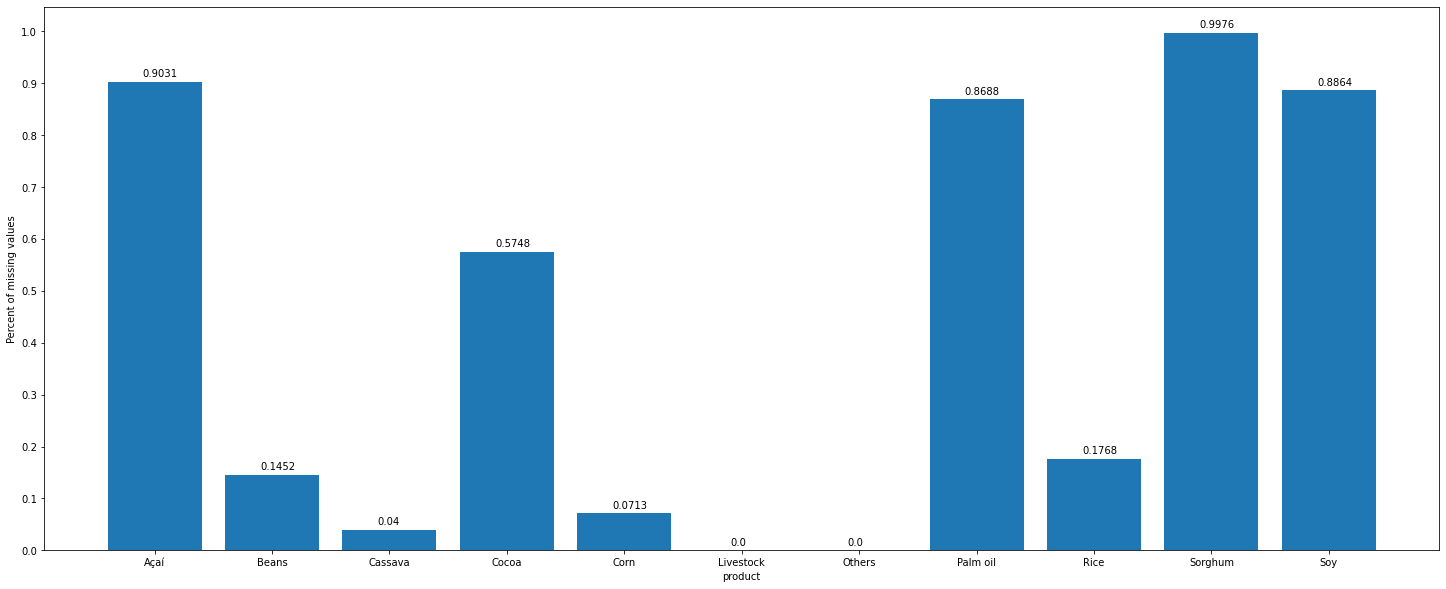

In [13]:
#percent of missing values per year
percent_missing_values_per_product = []
products = []
for product,sub_df in df.groupby('product'):
    percent_missing_values_per_product.append(1 - sub_df.destinated_area.isnull().value_counts()[0]/len(sub_df))
    products.append(product)

#Grapich
_ = plt.figure(figsize = (25,10))
plt.xlabel('product')
plt.ylabel('Percent of missing values')
plt.bar(products,percent_missing_values_per_product)
plt.yticks(np.linspace(0,1,11))
for i,j in enumerate(percent_missing_values_per_product):
    plt.text(i-.1,j+.01,str(round(j,4)))

plt.show()


In [14]:
#Transform city_code label to numeric labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.city_code)
city_code_numeric = le.transform(df.city_code)
df.loc[:,'city_code']  = list(map(lambda x: str(x),city_code_numeric))

/tmp/ipykernel_274086/381520910.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'city_code']  = list(map(lambda x: str(x),city_code_numeric))


In [15]:
#A function that returns the time series per year of a product in a city
def get_time_series(df):
    full_historic = []
    percent_missing_values = {}
    full_historic_index = []
    full_historic_attributes = {'city_code': [], 'product': [],'product_type': []}
    for attributes,sub_df in df.groupby(['city_code','product','product_type']):
        full_historic.append(list(sub_df.destinated_area))
        percent_missing_values.update({"/".join(attributes): sub_df.destinated_area.isna().mean()})
        full_historic_index.append("/".join(attributes))
        aux = list(attributes)
        full_historic_attributes.get('city_code').append(aux[0])
        full_historic_attributes.get('product').append(aux[1])
        full_historic_attributes.get('product_type').append(aux[2])

    time_series = pd.DataFrame(full_historic, index = full_historic_index)
    time_series.loc[:,'city_code'] = full_historic_attributes.get('city_code')
    time_series.loc[:,'product'] = full_historic_attributes.get('product')
    time_series.loc[:,'product_type'] = full_historic_attributes.get('product_type')

    return time_series,percent_missing_values

In [16]:
#Anlysis the time series that have percent of missing values lower than 50%
time_series,percent_missing_values = get_time_series(df)

keys = []
for key in map(lambda x: x[0] if x[1] <= .5 else 0,percent_missing_values.items()):
    if key != 0:
        keys.append(key)

prepared_df = time_series.loc[keys,:]

In [17]:
#is it possible to transofrm the sequence [x,nan,x] into [x,x,x]?
#First we will analyse the prepare_df
can_change = 0
cant_change = 0
for key,line in prepared_df.fillna(-1).iterrows():
    for position in range(1,20):
        if line.iloc[position-1] == line.iloc[position+1]:
            if line.iloc[position] == line.iloc[position-1] and line.iloc[position] != -1:
                can_change += 1
            elif line.iloc[position] != line.iloc[position-1] and line.iloc[position] != -1:
                cant_change +=1
print(f'can change: {can_change}, can`t change: {cant_change}')

#So i'ts not possible to generalize this, but we will look this per city

can change: 1716, can`t change: 1464


In [18]:
can_change = []
cant_change = []
cities = []
for city,sub_df in prepared_df.fillna(-1).groupby('city_code'):
    aux_can_change = 0
    aux_cant_change = 0
    cities.append(city)
    for key,line in sub_df.fillna(-1).iterrows():
        for position in range(1,20):
            if line.iloc[position-1] == line.iloc[position+1]:
                if line.iloc[position] == line.iloc[position-1] and line.iloc[position] != -1:
                    aux_can_change += 1
                elif line.iloc[position] != line.iloc[position-1] and line.iloc[position] != -1:
                    aux_cant_change += 1
    can_change.append(aux_can_change)
    cant_change.append(aux_cant_change)

In [19]:
#Look at a graph
qtd = []
can_change_percent = []
for i in range(len(can_change)):
    can_change_percent.append(0 if (can_change[i]+cant_change[i])==0 else can_change[i]/(can_change[i]+cant_change[i]))
    qtd.append(can_change[i]+cant_change[i])

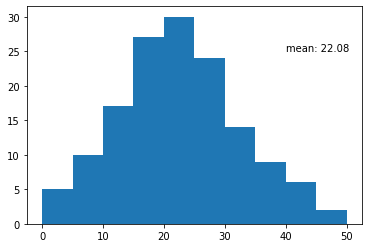

In [18]:
#Graphic
plt.hist(qtd,bins = 10)
plt.text(40,25,f'mean: {round(sum(qtd)/len(qtd),2)}')
plt.show()

In [20]:
#How many cases up 25 and with percent up 0.8?
cities_can_change = []
for i in range(len(qtd)):
    if qtd[i] >= 25 and can_change_percent[i] >= .75:
        cities_can_change.append(cities[i])

In [21]:
#Anlyse by product
can_change = []
cant_change = []
products = []
for product,sub_df in prepared_df.fillna(-1).groupby('product'):
    aux_can_change = 0
    aux_cant_change = 0
    products.append(product)
    for key,line in sub_df.fillna(-1).iterrows():
        for position in range(1,20):
            if line.iloc[position-1] == line.iloc[position+1]:
                if line.iloc[position] == line.iloc[position-1] and line.iloc[position] != -1:
                    aux_can_change += 1
                elif line.iloc[position] != line.iloc[position-1] and line.iloc[position] != -1:
                    aux_cant_change += 1
    can_change.append(aux_can_change)
    cant_change.append(aux_cant_change)

In [22]:
qtd = []
can_change_percent = []
for i in range(len(can_change)):
    can_change_percent.append(0 if (can_change[i]+cant_change[i])==0 else can_change[i]/(can_change[i]+cant_change[i]))
    qtd.append(can_change[i]+cant_change[i])

In [23]:
print(f'qtd: {qtd}\ncan_change_percent: {list(map(lambda x: round(x,2),can_change_percent))}\nproduct: {products}')

#It`s possible to generalize this for Others

qtd: [446, 498, 254, 368, 0, 1201, 98, 290, 25]
can_change_percent: [0.28, 0.32, 0.48, 0.26, 0, 0.91, 0.52, 0.22, 0.12]
product: ['Beans', 'Cassava', 'Cocoa', 'Corn', 'Livestock', 'Others', 'Palm oil', 'Rice', 'Soy']


In [24]:
#Aply this imputation ([x,nan,x] -> [x,x,x]) for the cities in list cities_can_change and for product Palm oil
missing_df = time_series.loc[list(set(time_series.index)-set(keys)),:]
before_percent_missing_values = missing_df.isna().mean().mean()

#Apply this imputation
for key,line in missing_df.iterrows():
    if line.city_code in cities_can_change or line.product == 'Others':
        auxiliar_line = line.fillna(-1)
        for position in range(1,20):
            if (auxiliar_line.iloc[position-1] != -1 and auxiliar_line.iloc[position-1] == auxiliar_line.iloc[position+1] ):
                missing_df.loc[key,position] = auxiliar_line.iloc[position-1]

after_percent_missing_values = missing_df.isna().mean().mean()

print(f'before: {round(before_percent_missing_values,4)} afeter: {round(after_percent_missing_values,4)}')

#This strategy it`s no so effective

before: 0.824 afeter: 0.8236


In [25]:
#Before a 0, there is any number diferent from zero? 
Number_before_zero = 0
zero_before_zero = 0
interval = [21-i for i in range(1,22)]
for key,line in prepared_df.fillna(-1).iterrows():
    for i in interval:
        if line.iloc[i] == 0:
            for j in range(i):
                if line.iloc[j] == 0:
                    zero_before_zero += 1
                elif line.iloc[j] != -1:
                    Number_before_zero += 1
        break

print(f'number before zero: {Number_before_zero} zero before zero: {zero_before_zero}')                

number before zero: 474 zero before zero: 486


In [25]:
##How much of the line is composed by missing values?
#missing_values_column = []
#for key,line in missing_df.fillna(-1).iterrows():
#    aux = 0
#    for i in line.iloc[0:21]:
#        if i == -1:
#            aux += 1
#    missing_values_column.append(round(aux/21,2))
#missing_df.loc[:,'missing_values_percent'] = missing_values_column

In [26]:
#Create the graphs per city to look the behavior of products
import generate_graphics_per_city as gg_city
directory = "destinated_area_per_city"
scale = np.arange(0,55000,5000)
limit = None

for city,sub_df_per_city in prepared_df.groupby('city_code'):
    gg_city.generate_graph(city,sub_df_per_city,missing_df,directory,scale,limit)


In [27]:
#We notice that Livestock values is much superior than others, so we will plot graphs without they
prepared_df_no_livestock = prepared_df.loc[~prepared_df['product'].isin(['Livestock'])]

#Create the graphs per city to look the behavior of products
directory = "destinated_area_per_city_without_livestock"
scale = np.arange(0,10000,1000)
limit = (0,10000)

for city,sub_df_per_city in prepared_df_no_livestock.groupby('city_code'):
    gg_city.generate_graph(city,sub_df_per_city,missing_df,directory,scale,limit)


In [28]:
#Before decide anything, it`s worth to look this graphs by product
#Create the graphs per product to look the behavior
import generate_graphics_per_product as gg_product
directory = "destinated_area_per_product"
scale = np.arange(0,10000,1000)
limit = (0,10000)

for city,sub_df_per_city in prepared_df.groupby('product'):
    gg_product.generate_graph(city,sub_df_per_city,missing_df,directory,scale,limit)

In [29]:
#When we look the product_Beans graphic, the values are concerned in a area between 0,2000. So, we will replace the missing data for the mean
missing_df.loc[missing_df['product'] == 'Beans']

0      1      2      3     4     5     6      7  \
43/Beans/temporary    10.0   10.0    NaN  150.0   NaN   NaN   NaN    NaN   
22/Beans/temporary     NaN    NaN    NaN    NaN   NaN   NaN   NaN  175.0   
17/Beans/temporary   269.0  228.0    NaN    NaN   NaN   NaN   NaN   15.0   
124/Beans/temporary    5.0    8.0    8.0    8.0   NaN   NaN   NaN    NaN   
68/Beans/temporary     NaN    NaN    NaN    NaN   NaN   NaN   NaN    NaN   
80/Beans/temporary     NaN    NaN    NaN    NaN   NaN   NaN   NaN    NaN   
126/Beans/temporary   25.0   20.0  100.0  100.0   NaN   NaN   NaN    NaN   
24/Beans/temporary     NaN   20.0   20.0   12.0   NaN  20.0   NaN    NaN   
119/Beans/temporary    5.0    6.0    NaN    NaN   NaN   NaN  10.0    NaN   
103/Beans/temporary    NaN    8.0    NaN    NaN   NaN   NaN   NaN    NaN   
96/Beans/temporary     NaN    NaN   10.0   10.0   NaN   NaN   NaN    NaN   
81/Beans/temporary     9.0    8.0   10.0    NaN  12.0  10.0  18.0    NaN   
8/Beans/temporary      4.0   10.0    5.0    NaN   3.0   5.0   3.0    NaN   
3/Beans/temporary      NaN    NaN    NaN    NaN   NaN   NaN   NaN    NaN   
42/Beans/temporary   167.0  300.0    NaN    NaN   NaN   NaN   NaN    NaN   

                        8      9  ...     14     15    16     17    18    19  \
43/Beans/temporary    NaN    NaN  ...    NaN    NaN   NaN    NaN   NaN   NaN   
22/Beans/temporary    NaN    NaN  ...  325.0    NaN   NaN  125.0   NaN   NaN   
17/Beans/temporary    NaN    NaN  ...    4.0    NaN   3.0   12.0   NaN   NaN   
124/Beans/temporary   NaN    NaN  ...    NaN    NaN   NaN    NaN   NaN   NaN   
68/Beans/temporary    NaN    NaN  ...    NaN    NaN   NaN    NaN   NaN   NaN   
80/Beans/temporary    NaN    NaN  ...    NaN    NaN   NaN    NaN   NaN   NaN   
126/Beans/temporary   NaN    NaN  ...    NaN    NaN  25.0    NaN   NaN   NaN   
24/Beans/temporary    NaN    NaN  ...    NaN    NaN   NaN    NaN   NaN   NaN   
119/Beans/temporary  32.0  210.0  ...    NaN  286.0   NaN   10.0   NaN  10.0   
103/Beans/temporary   NaN    NaN  ...    NaN    NaN   NaN    NaN   NaN   NaN   
96/Beans/temporary    NaN    NaN  ...    NaN    NaN  45.0    NaN  40.0   NaN   
81/Beans/temporary    NaN    NaN  ...    NaN    NaN   NaN    NaN   NaN   NaN   
8/Beans/temporary    20.0    NaN  ...    NaN    NaN   NaN    NaN   NaN   3.0   
3/Beans/temporary     NaN    NaN  ...    NaN    NaN   NaN    NaN   NaN   NaN   
42/Beans/temporary    NaN    NaN  ...    NaN    1.0   NaN    NaN   NaN   NaN   

                        20  city_code  product  product_type  
43/Beans/temporary     NaN         43    Beans     temporary  
22/Beans/temporary   125.0         22    Beans     temporary  
17/Beans/temporary    12.0         17    Beans     temporary  
124/Beans/temporary    NaN        124    Beans     temporary  
68/Beans/temporary     NaN         68    Beans     temporary  
80/Beans/temporary    60.0         80    Beans     temporary  
126/Beans/temporary    NaN        126    Beans     temporary  
24/Beans/temporary     NaN         24    Beans     temporary  
119/Beans/temporary    NaN        119    Beans     temporary  
103/Beans/temporary    NaN        103    Beans     temporary  
96/Beans/temporary     NaN         96    Beans     temporary  
81/Beans/temporary     NaN         81    Beans     temporary  
8/Beans/temporary      NaN          8    Beans     temporary  
3/Beans/temporary      NaN          3    Beans     temporary  
42/Beans/temporary     NaN         42    Beans     temporary  

[15 rows x 24 columns]

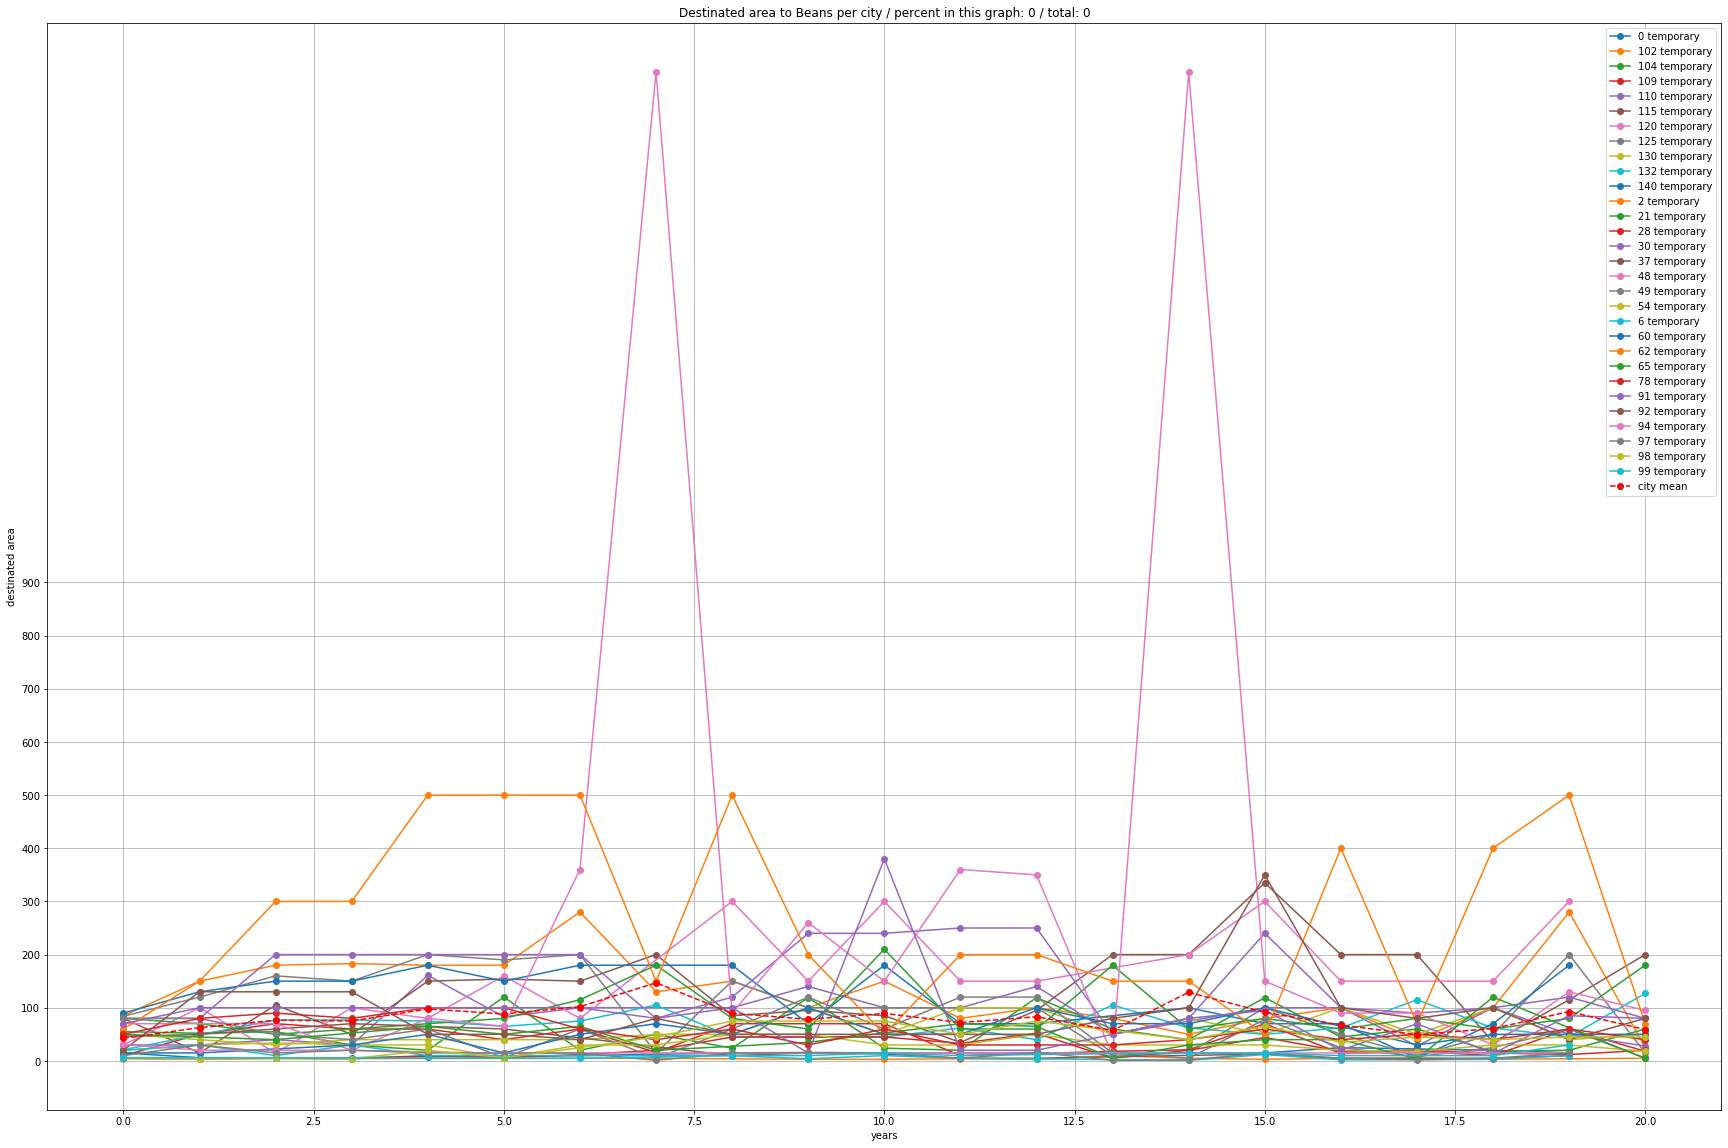

In [30]:
#The missing values area concerned in the range(0,100), so we will use this values 
aux_df = prepared_df.loc[prepared_df['product'] == 'Beans']
aux_df = aux_df.loc[aux_df[0] < 100]
scale = np.arange(0,1000,100)
gg_product.generate_graph('Beans',aux_df,None,None,scale,None)

In [31]:
#Complete the missing values for Beans
mean = aux_df.iloc[:,0:21].mean()
aux_df_2 = missing_df.loc[missing_df['product'] == 'Beans'].fillna(-1)
missing_df = missing_df.loc[missing_df['product'] != 'Beans']
for key,line in aux_df_2.iterrows():
    for position in range(0,21):
        if line.iloc[position] == -1:
            aux_df_2.loc[key,position] = mean.iloc[position]

prepared_df = pd.concat([prepared_df,aux_df_2])

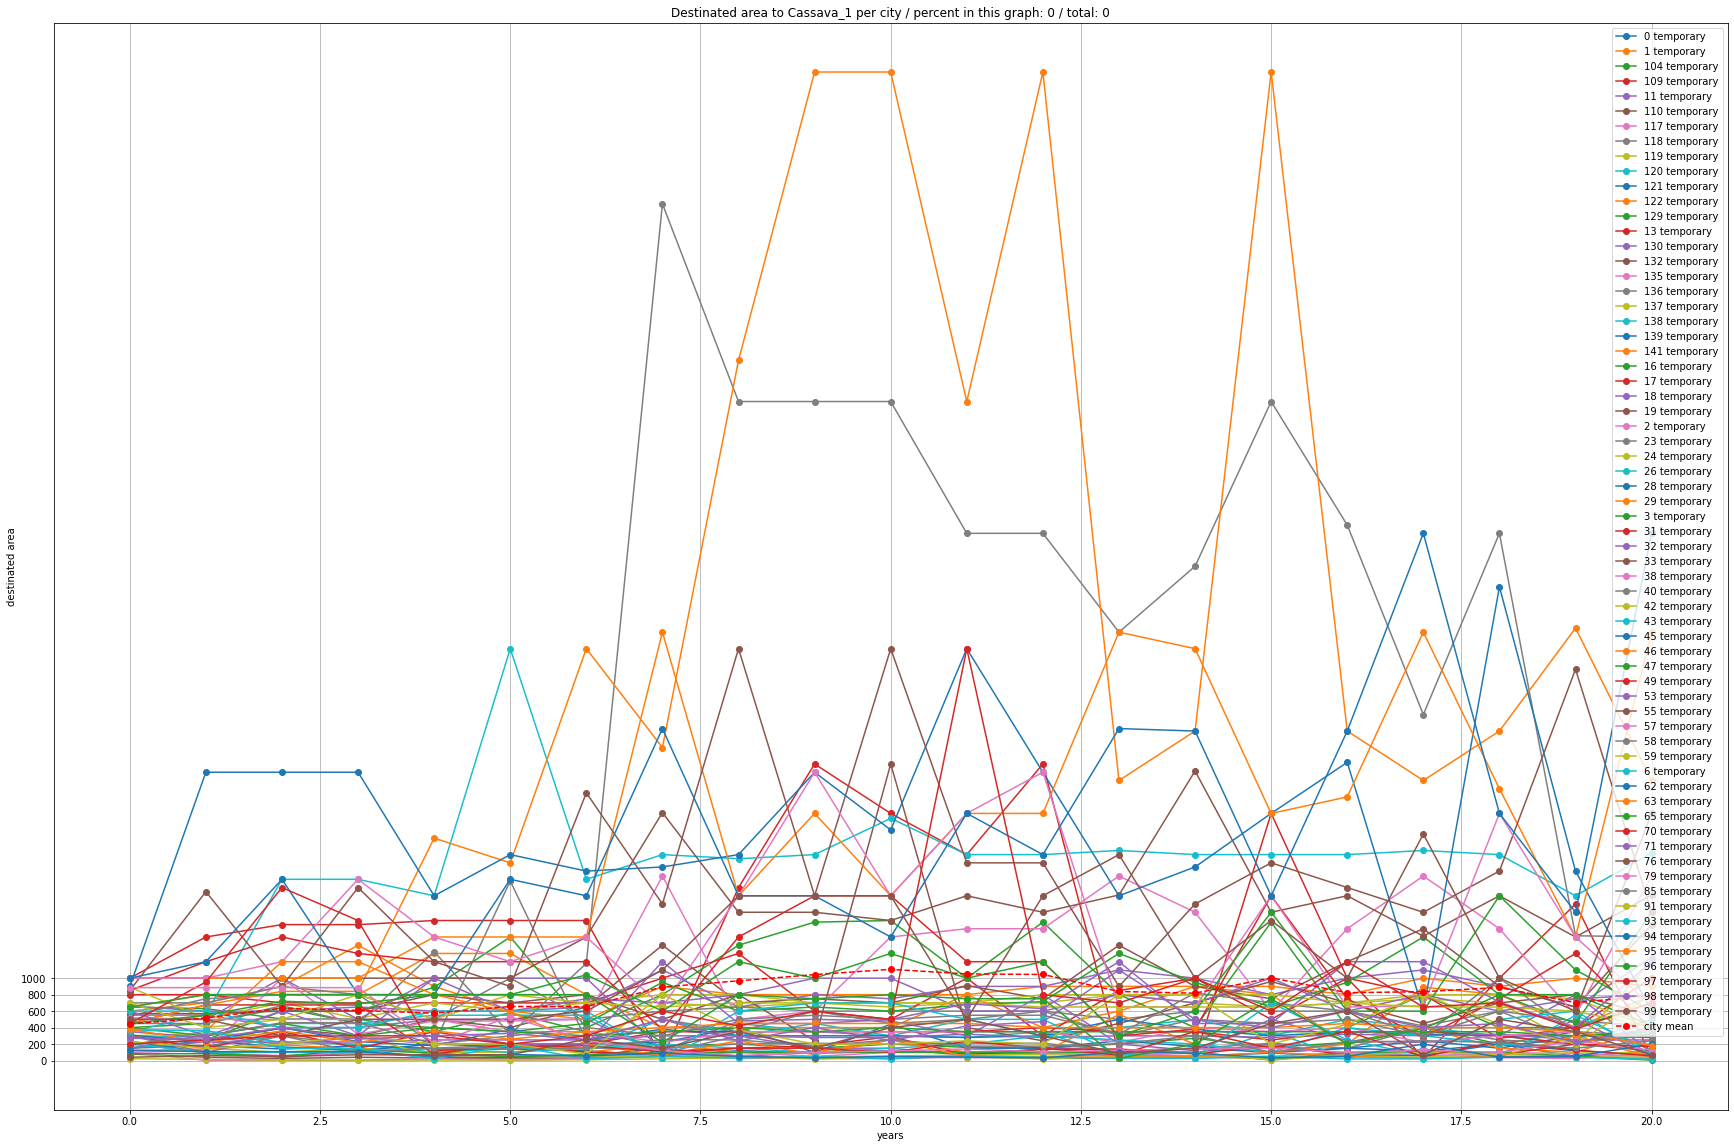

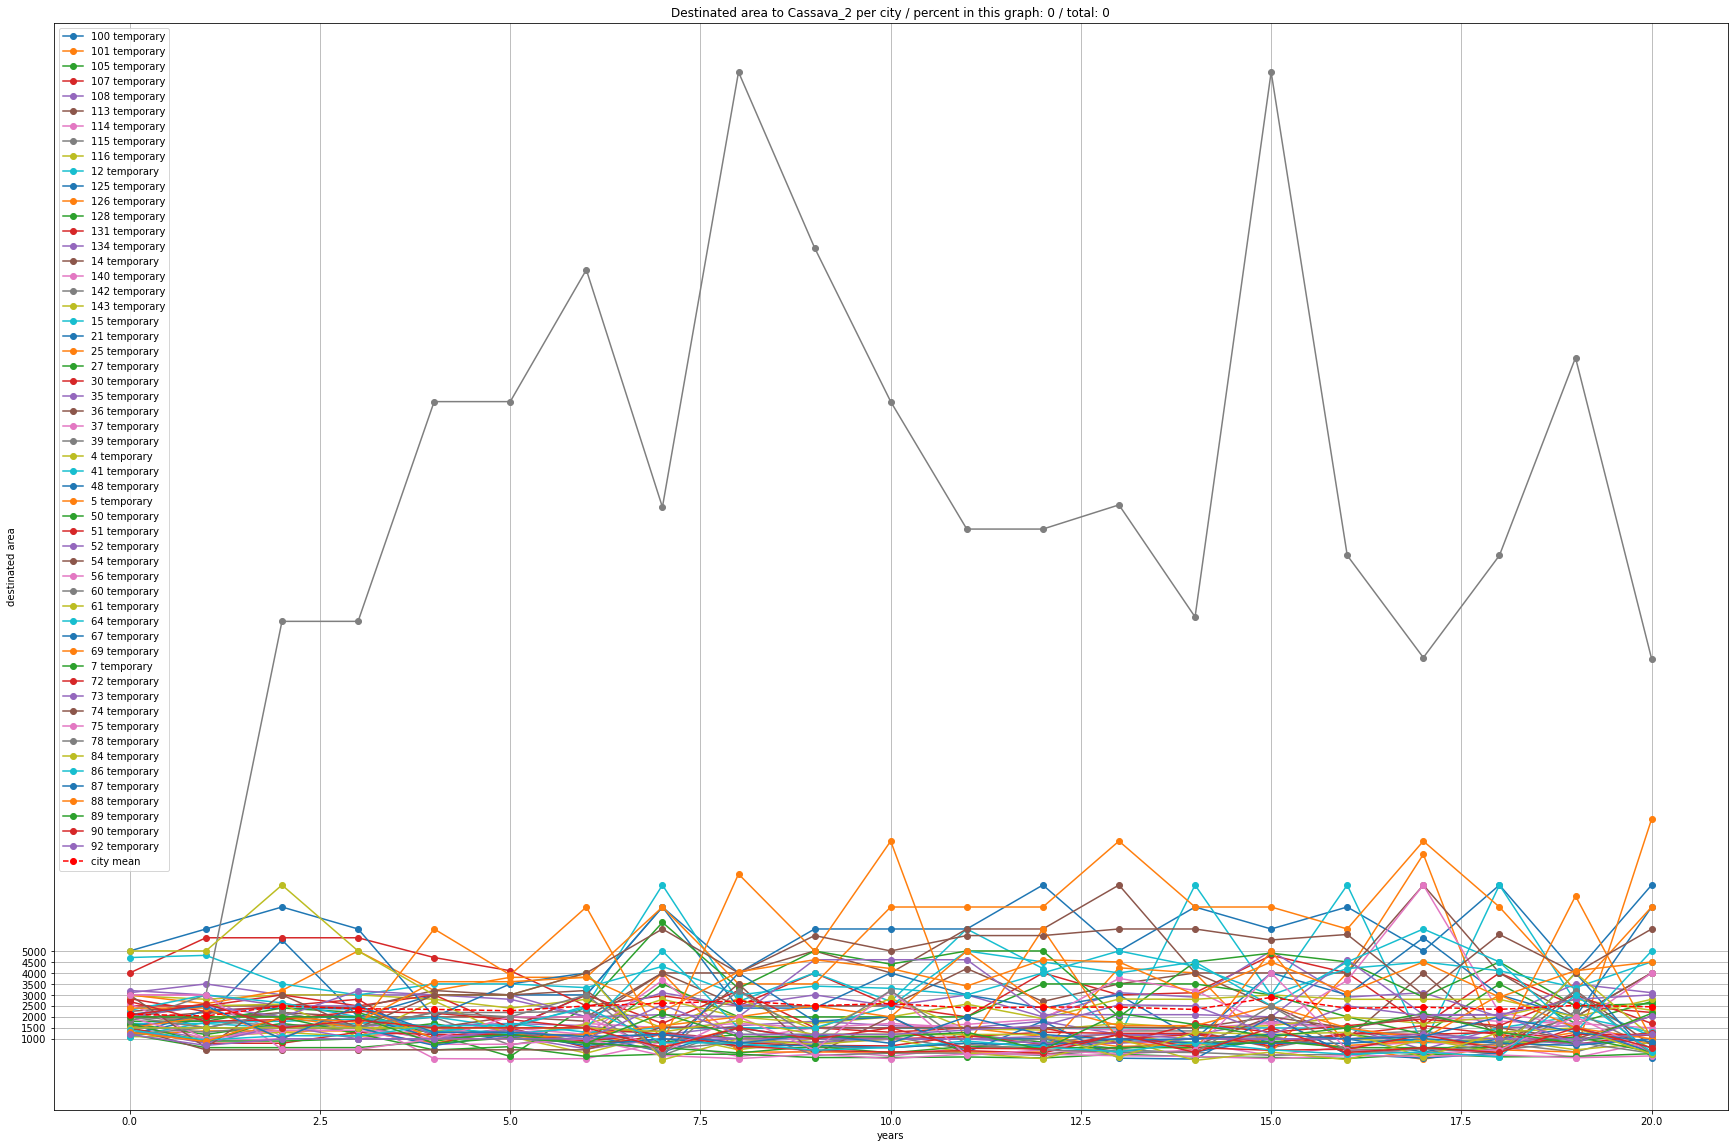

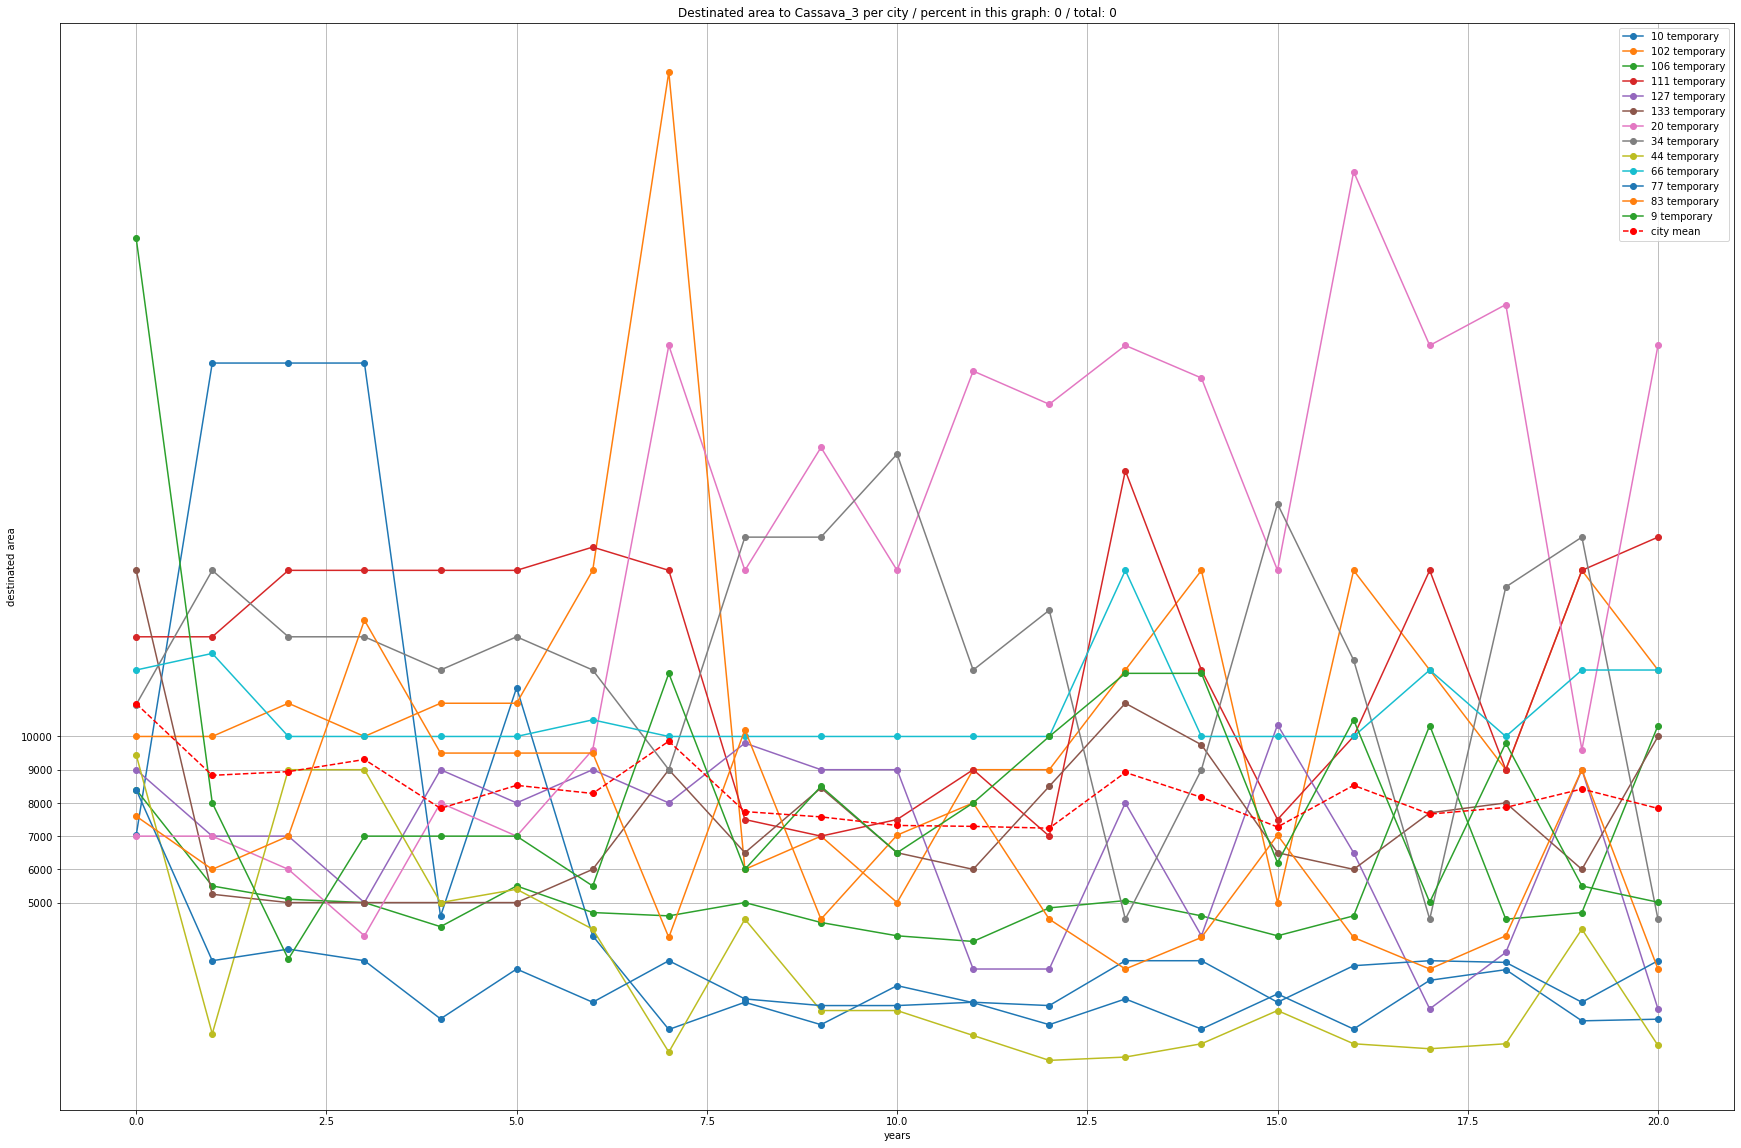

In [32]:
#We notice that Cassava has a standard behavior in the cities, if the inicial value is high, the others values tend to be high, and if the inicial value is low, the others tend to be low
#We will plot three graphs

#Split dataset
cassava_df = []
aux_df = prepared_df.loc[prepared_df['product'] == 'Cassava']
cassava_df.append(aux_df.loc[aux_df[0] <= 1000])
aux_df = aux_df.loc[aux_df[0] > 1000]
cassava_df.append(aux_df.loc[aux_df[0] <= 5000])
aux_df = aux_df.loc[aux_df[0] > 5000]
cassava_df.append(aux_df)

#Plot the graphs
#gg_product.generate_graph('Beans',aux_df,None,None,scale,None)
gg_product.generate_graph('Cassava_1',cassava_df[0],None,None,np.arange(0,1200,200),None)
gg_product.generate_graph('Cassava_2',cassava_df[1],None,None,np.arange(1000,5500,500),None)
gg_product.generate_graph('Cassava_3',cassava_df[2],None,None,np.arange(5000,11000,1000),None)

In [34]:
#The two firts graphs has a similiar behavior, all the values are inside a specific region, but we will look the lines that have missing values
missing_df.loc[missing_df['product'] == 'Cassava']

#Excpet the city 22, all the cities has vlues in (0,200). Let`s see this cities

0      1      2      3     4     5    6       7  \
103/Cassava/temporary    NaN  100.0   50.0   50.0  50.0  50.0  NaN     NaN   
8/Cassava/temporary      4.0    2.0    2.0    2.0   3.0   2.0  3.0     NaN   
68/Cassava/temporary     NaN    NaN    NaN    NaN   NaN   NaN  NaN   100.0   
22/Cassava/temporary     NaN    NaN    NaN    NaN   NaN   NaN  NaN  9330.0   
124/Cassava/temporary  100.0  130.0  150.0  150.0   NaN  25.0  NaN     NaN   
80/Cassava/temporary    45.0   60.0   60.0   60.0  60.0  60.0  NaN   120.0   

                         8   9  ...      14     15     16      17     18   19  \
103/Cassava/temporary  NaN NaN  ...     NaN    NaN    NaN     NaN    NaN  NaN   
8/Cassava/temporary    1.0 NaN  ...     NaN    NaN    NaN     NaN    NaN  2.0   
68/Cassava/temporary   NaN NaN  ...   100.0  100.0  100.0   100.0  100.0  NaN   
22/Cassava/temporary   NaN NaN  ...  8910.0    NaN    NaN  1200.0    NaN  NaN   
124/Cassava/temporary  NaN NaN  ...     NaN    8.0   30.0    30.0   30.0  NaN   
80/Cassava/temporary   NaN NaN  ...   120.0    NaN  100.0   100.0  100.0  NaN   

                           20  city_code  product  product_type  
103/Cassava/temporary     NaN        103  Cassava     temporary  
8/Cassava/temporary       NaN          8  Cassava     temporary  
68/Cassava/temporary    170.0         68  Cassava     temporary  
22/Cassava/temporary   1000.0         22  Cassava     temporary  
124/Cassava/temporary     NaN        124  Cassava     temporary  
80/Cassava/temporary    200.0         80  Cassava     temporary  

[6 rows x 24 columns]

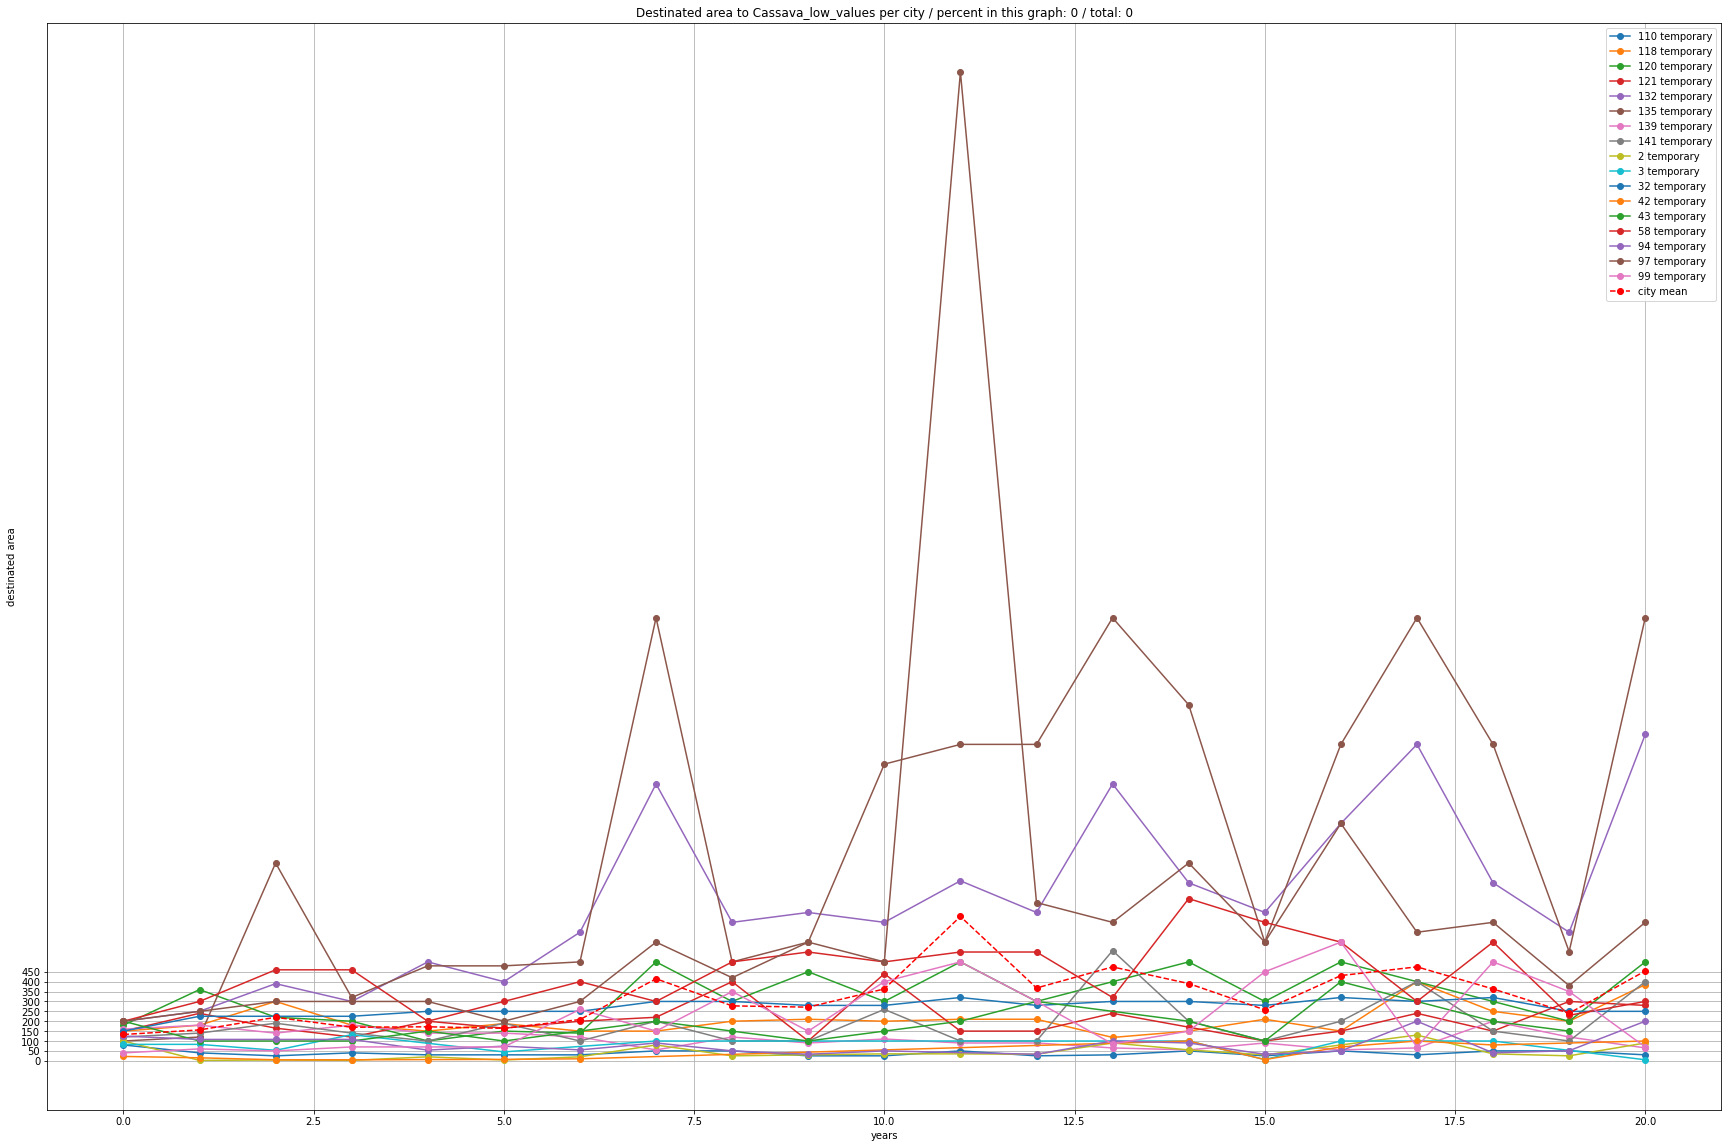

In [35]:
#prepare data
#Split dataset
aux_df = prepared_df.loc[prepared_df['product'] == 'Cassava']
aux_df = aux_df.loc[aux_df[0] <= 200]

#Plot the graphs
gg_product.generate_graph('Cassava_low_values',aux_df,None,None,np.arange(0,500,50),None)


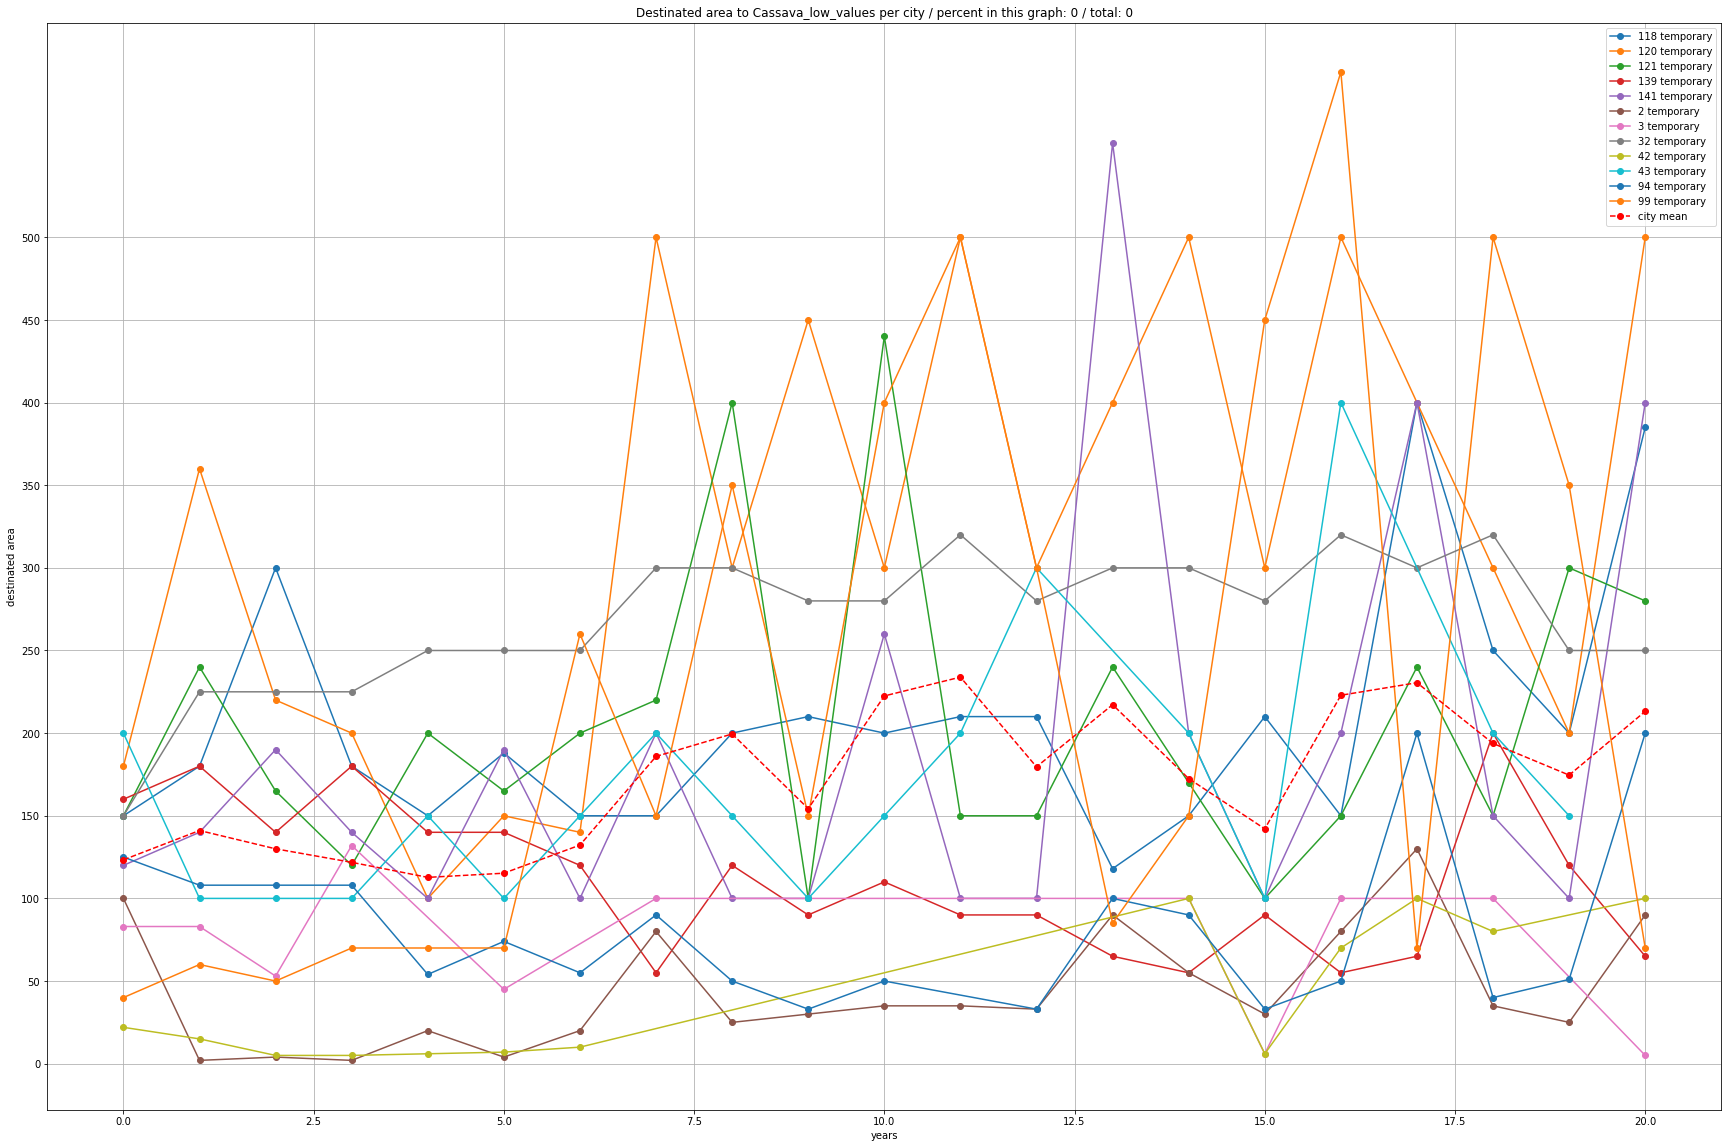

In [36]:
#Let`s remove this cities that have high values, becasue they have high values along all the years
aux_df = aux_df.loc[~aux_df.city_code.isin(['97','132','135','110','58'])]

#Plot the graphs
gg_product.generate_graph('Cassava_low_values',aux_df,None,None,np.arange(0,550,50),None)

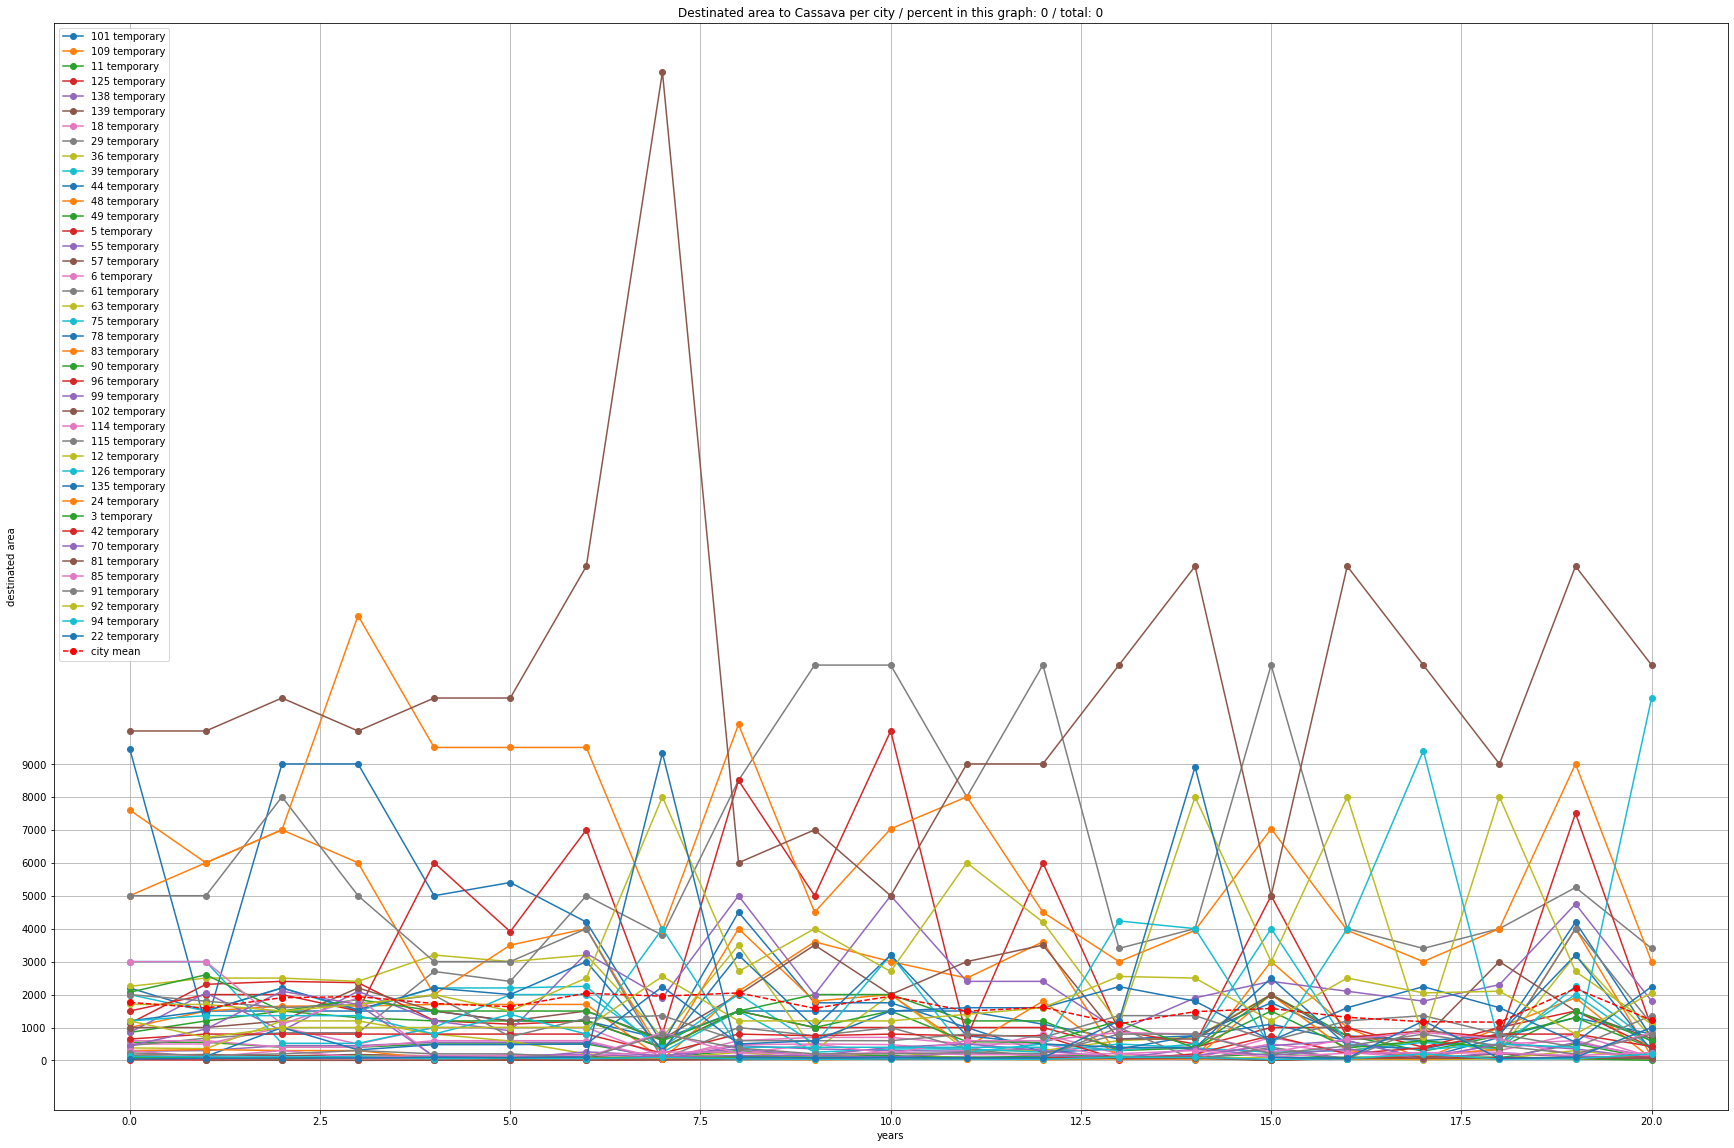

In [37]:
#Now, we imput this values
cassava_mising_df = missing_df.loc[missing_df['product'] == 'Cassava'].iloc[[0,1,2,3,5],:].fillna(-1)
cassava_mean = aux_df.iloc[:,0:21].mean()

#Complete the missing Cassava 
for key,line in cassava_mising_df.iterrows():
    for position in range(0,21):
        if line.iloc[position] == -1:
            cassava_mising_df.loc[key,position] = mean.iloc[position]

prepared_df = pd.concat([prepared_df,cassava_mising_df])

#Select special line
cassava_special_line = missing_df.loc[missing_df['product'] == 'Cassava'].iloc[4,:].fillna(-1)

#To deal with this special line,let`s look the lines that have a peak in year 7-8 and 14-15
cassava_df = prepared_df.loc[prepared_df['product'] == 'Cassava']
cassava_peak_7_8 = np.array(cassava_df.iloc[:,8])/np.array(cassava_df.iloc[:,7])
cassava_peak_14_15 = np.array(cassava_df.iloc[:,14])/np.array(cassava_df.iloc[:,15])

#Return positions that this growth is superior a 100%
position_1 = []
for i in range(len(cassava_peak_7_8)):
    if cassava_peak_7_8[i] > 2:
        position_1.append(i)

position_2 = []
for i in range(len(cassava_peak_14_15)):
    if cassava_peak_14_15[i] > 2:
        position_2.append(i)
    
position = [*position_1,*position_2]
gg_product.generate_graph('Cassava',cassava_df.iloc[position,:],None,None,np.arange(0,10000,1000),None)

In [38]:
#This is god mean to use,now we replace the data
mean_special_line = cassava_df.iloc[position,0:21].mean()

for i in range(0,21):
    if cassava_special_line[i] == -1:
        cassava_special_line[i] = mean_special_line[i]

prepared_df = pd.concat([prepared_df,pd.DataFrame([list(cassava_special_line)],index = ['22/Cassava/temporary'], columns = cassava_df.columns)])


missing_df = missing_df.loc[missing_df['product'] != 'Cassava']

In [39]:
#Now the missing lines will be impute by the mean of the city 
city_mean = {}
for city, sub_df in prepared_df.groupby('city_code'):
    city_mean.update({city: sub_df.iloc[:,0:21].mean()}) 

In [40]:
#Fill the missing values in missing_df
for key,line in missing_df.fillna(-1).iterrows():
    for position in range(0,21):
        if line.iloc[position] == -1:
            missing_df.loc[key,position] = city_mean.get(line.city_code).iloc[position]

In [41]:
#Complete the prepare_df with linear regression
from sklearn.linear_model import LinearRegression
for key,line in prepared_df.fillna(-1).iterrows():
    missing_values = set()
    need_linear_regression = False
    for position in range(0,21):
        if line.iloc[position] == -1:
            need_linear_regression = True
            missing_values.add(position)
    
    if need_linear_regression:
        x = list({i for i in range(0,21)} - missing_values)
        y = line.iloc[x]
        line = LinearRegression()
        line.fit(np.array(x).reshape(-1,1),y)
        results = line.predict(np.array(list(missing_values)).reshape(-1,1))
        for x_value,result in zip(list(missing_values),list(results)):
            prepared_df.loc[key,x_value] = result

In [42]:
#Concatenate df
time_series = pd.concat([prepared_df,missing_df])

#Return the names of cities
cities = le.inverse_transform(list(map(lambda x: int(x),time_series.city_code)))
time_series.loc[:,'city_code'] = cities

#Export dataset
time_series.to_csv(f'dataset{os.sep}time_series_after_exploratory_analysis_and_cleaning_data_1.csv', sep = ';')

In [43]:
#Prepare the data to output a df similiar to df that we read
export_df = pd.DataFrame([],columns = ['destinated_area', 'city_code', 'product', 'product_type'])
for i in range(0,21):
    sub_df = time_series.iloc[:,[i,21,22,23]]
    sub_df.loc[:,'year'] = str(1997 + i)
    sub_df.columns = ['destinated_area', 'city_code', 'product', 'product_type','year']
    export_df = pd.concat([export_df,sub_df])
export_df.reset_index(inplace = True)
export_df = export_df.iloc[:,1::]

#Export dataset
export_df.to_csv(f'dataset{os.sep}dataframe_after_exploratory_analysis_and_cleaning_data_1.csv', sep = ';')

/tmp/ipykernel_274086/1601820400.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.loc[:,'year'] = str(1997 + i)
/tmp/ipykernel_274086/1601820400.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.loc[:,'year'] = str(1997 + i)
/tmp/ipykernel_274086/1601820400.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab